In [1]:
#region Basic_Import
## Basic
import os, sys, warnings
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.path.dirname(os.path.abspath('./__file__'))
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./__file__'))))
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from pandas import DataFrame, Series
pd.options.display.float_format = '{:.10f}'.format

import math, random

## Datetime
import time, datetime as dt
from datetime import datetime, date, timedelta

## glob
import glob, requests, json
from glob import glob

## 시각화
import matplotlib.pyplot as plt, seaborn as sns
# %matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

from scipy import stats

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix

## 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

import urllib
from urllib.request import urlopen
from urllib.parse import urlencode, unquote, quote_plus

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from tqdm.notebook import tqdm
import tqdm
#endregion Basic_Import

In [2]:
## Import_DL
str_tar = "tf"
## For Torch
if str_tar == "torch":
    import torch, torch.nn as nn
    from torch.nn.utils import weight_norm
    print("Torch Imported")
## For TF
elif str_tar == "tf":
    import tensorflow as tf, tensorflow_addons as tfa
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from keras.models import Sequential, load_model
    from keras_flops import get_flops
    print("Tensorflow Imported")
else:
    print("Error : Cannot be used except for Keywords")
    print(" : torch / tf")

Tensorflow Imported


In [3]:
## Import_Local
from Src_Dev_Common import Data_Datetime as com_date
# from Src_Dev_Common import DEV_KASI_Holiday as com_Holi
# from Src_Dev_Common import DEV_Common_Data_Analysis as com_Analysis
from Src_Dev_Common import Data_Preprocessing as com_Prep
from Src_Dev_Common import Common_Model as com_Model
# from Src_Dev_Common import DEV_Common_Data_Visualization as com_Visual
# from Src_Dev_Common import DEV_KMA_Weather_ASOS as com_ASOS
# from Src_Dev_Common import DEV_KDHC_Usage as com_KDHC
# from Src_Dev_Common import DEV_KIER_Usage as com_KIER

ImportError: cannot import name 'DEV_Common_Data_Datetime' from 'Src_Dev_Common' (unknown location)

## Data Load

In [ ]:
## Raw Data Load
df_KIER_5Domain = pd.read_csv('KIER_Merged_5domain_2024-07-08.csv', index_col = 0)

data = df_KIER_5Domain.drop(['METER_DATE', 'YEAR'], axis=1)
back_data = df_KIER_5Domain.drop(['YEAR'], axis=1)

print(df_KIER_5Domain.shape, '///', df_KIER_5Domain.columns)
df_KIER_5Domain

(16413, 29) /// Index(['METER_DATE', 'YEAR', 'MONTH', 'DAY', 'code_day_of_the_week', 'HOUR',
       'MINUTE', 'temp_outdoor', 'temp_dew_point', 'temp_ground', 'humidity',
       'rainfall', 'snowfall', 'snowfall_3hr', 'wind_speed', 'wind_direction',
       'pressure_vapor', 'pressure_area', 'pressure_sea', 'sunshine',
       'solar_radiation', 'cloud_total', 'cloud_midlow', 'visual_range',
       'ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST'],
      dtype='object')


,METER_DATE,YEAR,MONTH,DAY,code_day_of_the_week,HOUR,MINUTE,temp_outdoor,temp_dew_point,temp_ground,...,sunshine,solar_radiation,cloud_total,cloud_midlow,visual_range,ELEC_INST,HEAT_INST,WATER_INST,HOT_INST,GAS_INST
0,2022-07-20 13:00:00,2022,7,20,2,13,0,29.8000000000,21.4000000000,41.5000000000,...,1.0000000000,2.8900000000,8.0000000000,2.0000000000,1903.0000000000,194.7787303232,0.0001975346,7.0350500000,0.0000093275,0.0000000000
1,2022-07-20 14:00:00,2022,7,20,2,14,0,30.4000000000,20.0000000000,42.4000000000,...,1.0000000000,2.8500000000,8.0000000000,1.0000000000,1986.0000000000,185.5468089258,0.0001975346,7.0453500000,0.0000031403,0.0003690685
2,2022-07-20 15:00:00,2022,7,20,2,15,0,30.5000000000,21.0000000000,41.9000000000,...,0.8000000000,2.3800000000,7.0000000000,2.0000000000,1985.0000000000,191.8368089258,0.0001975346,6.4400500000,0.0000034357,0.0102684149
3,2022-07-20 16:00:00,2022,7,20,2,16,0,30.8000000000,20.7000000000,39.7000000000,...,1.0000000000,2.1900000000,5.0000000000,3.0000000000,1993.0000000000,185.9038264696,0.0001975346,7.4170000000,0.0000072374,0.0218035922
4,2022-07-20 17:00:00,2022,7,20,2,17,0,29.5000000000,20.0000000000,34.5000000000,...,0.3000000000,1.0200000000,9.0000000000,1.0000000000,2000.0000000000,189.2517825136,0.0001975346,10.2510000000,0.0000123613,0.0218035922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408,2024-06-03 05:00:00,2024,6,3,0,5,0,13.1000000000,10.8000000000,14.7000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2976.0000000000,80.6379999998,0.0000000000,6.0601202899,0.0000305033,0.0000000000
16409,2024-06-03 06:00:00,2024,6,3,0,6,0,13.7000000000,10.8000000000,15.0000000000,...,0.1000000000,0.0500000000,0.0000000000,0.0000000000,3874.0000000000,85.4079999998,0.0000000000,8.2929202899,0.0000944223,0.1200000000
16410,2024-06-03 07:00:00,2024,6,3,0,7,0,18.0000000000,11.9000000000,17.0000000000,...,1.0000000000,0.5600000000,0.0000000000,0.0000000000,5000.0000000000,111.6829999997,0.0000000000,11.7601202899,0.0002607810,0.3600000000
16411,2024-06-03 08:00:00,2024,6,3,0,8,0,19.7000000000,12.2000000000,22.5000000000,...,1.0000000000,1.2500000000,0.0000000000,0.0000000000,5000.0000000000,121.9929999998,0.0000000000,9.9387202899,0.0000540724,0.3800000000


##  For Scaling

In [ ]:
scaler_data = MinMaxScaler()
scaler_data.fit(data)
scaled_data = scaler_data.transform(data)

new_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

multi5_X = new_data.iloc[:-1,]
multi5_Y = new_data[['ELEC_INST', 'HEAT_INST', 'WATER_INST', 'HOT_INST', 'GAS_INST']].iloc[1:,]

trainX, testX, trainY, testY = train_test_split(multi5_X, multi5_Y, test_size=0.3, shuffle=False, random_state=0)

In [ ]:
def buildDataSet(input, target, seqLength):
    xdata = []
    ydata = []
    for i in range(len(input) - seqLength):
        tx = input.iloc[i:i+seqLength]
        ty = target.iloc[i+seqLength-1]
        xdata.append(tx)
        ydata.append(ty)
    return np.array(xdata), np.array(ydata)

In [ ]:
trainx, trainy = buildDataSet(trainX, trainY, 24)
testx, testy = buildDataSet(testX, testY, 24)

In [ ]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)
    #conv3 = tf.keras.layers.Conv1D(32, 1, activation='swish')(pool2) #
    #pool3 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv3)#

    # 인코더 - 디코더 선언
    #encoder_lstm1 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    #decoder_lstm3 = tf.keras.layers.LSTM(32, return_sequences=True, activation='tanh') #

    # 인코더
    #encoder_output_lstm1 = encoder_lstm1(pool3) #
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)
    #decoder_lstm3_output = decoder_lstm3(decoder_lstm2_output) #

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(5)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)
    
    return model

In [ ]:
def seq2seq_model(input_shape):
    model_input = tf.keras.layers.Input(shape=input_shape)

    # for feature extracting
    conv1 = tf.keras.layers.Conv1D(128, 1, activation='swish')(model_input)
    pool1 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 1, activation='swish')(pool1)
    pool2 = tf.keras.layers.MaxPool1D(pool_size=2, strides=1, padding='same')(conv2)

    # 인코더 - 디코더 선언
    encoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')
    encoder_lstm3 = tf.keras.layers.LSTM(128, return_state=True, return_sequences=True, activation='tanh')

    decoder_lstm1 = tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh')
    decoder_lstm2 = tf.keras.layers.LSTM(64, return_sequences=True, activation='tanh')

    # 인코더
    encoder_output_lstm2 = encoder_lstm2(pool2)
    encoder_output_lstm3, state_h, state_c = encoder_lstm3(encoder_output_lstm2)

    #디코더
    decoder_lstm1_output = decoder_lstm1(encoder_output_lstm3, initial_state=[state_h, state_c])
    decoder_lstm2_output = decoder_lstm2(decoder_lstm1_output)

    flatten = tf.keras.layers.Flatten()(decoder_lstm2_output)
    model_output = tf.keras.layers.Dense(5)(flatten)
    
    model = tf.keras.models.Model(model_input, model_output)
    
    return model



In [ ]:
model_5multi = seq2seq_model(input_shape=(24, 27))

In [ ]:
model_5multi.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 27)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 24, 128)      3584        ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 24, 128)      0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_1 (Conv1D)              (None, 24, 64)       8256        ['max_pooling1d[0][0]']          
                                                                                              

In [ ]:
flops_5multi = get_flops(model_5multi, batch_size=1)
print(f"Flops : {flops_5multi / 10 ** 3:.03} k")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Flops : 5.82e+02 k


In [ ]:
# 모델 컴파일
earlystopping = EarlyStopping(monitor='loss', patience=50)
checkpoint = ModelCheckpoint(moniter='loss',filepath='model_5multyi.h5')
model_5multi.compile(loss='mae', optimizer=tf.keras.optimizers.Adamax(learning_rate=3e-4,clipnorm=1.0), metrics=['mse'])
# 모델 요약 정보 출력
hist_model = model_5multi.fit(trainx, trainy, epochs=300, batch_size=256, callbacks=[earlystopping,checkpoint])

Epoch 1/300
45/45 [==============================] - 4s 16ms/step - loss: 0.0816 - mse: 0.0174
Epoch 2/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0641 - mse: 0.0104
Epoch 3/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0580 - mse: 0.0081
Epoch 4/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0534 - mse: 0.0069
Epoch 5/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0516 - mse: 0.0065
Epoch 6/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0504 - mse: 0.0063
Epoch 7/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0493 - mse: 0.0061
Epoch 8/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0482 - mse: 0.0058
Epoch 9/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0470 - mse: 0.0056
Epoch 10/300
45/45 [==============================] - 1s 15ms/step - loss: 0.0459 - mse: 0.0054
Epoch 11/300
45/45 [=============================

In [ ]:
# 정규화 되돌리기 함수 
def back_MinMax(data, value):
    diff = np.max(data, axis=0)-np.min(data, axis=0)
    back = value * diff + np.min(data, axis=0)
    return back 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def mean_bias_error(true, pred):
    mbe_loss = np.sum(true - pred)/true.size
    return mbe_loss

In [ ]:
def model_5multi_evaluation(model_5multi, back_data, testx, testy, str_case, list_domain):
    print(str_case)
    pred01 = back_MinMax(back_data.to_numpy()[:, [-3]], model_5multi.predict(testx)[:,0])
    pred02 = back_MinMax(back_data.to_numpy()[:, [-2]], model_5multi.predict(testx)[:,1])
    pred03 = back_MinMax(back_data.to_numpy()[:, [-1]], model_5multi.predict(testx)[:,2])
    pred04 = back_MinMax(back_data.to_numpy()[:, [-1]], model_5multi.predict(testx)[:,3])
    pred05 = back_MinMax(back_data.to_numpy()[:, [-1]], model_5multi.predict(testx)[:,4])

    real01 = back_MinMax(back_data.to_numpy()[:, [-3]], testy[:,0])
    real02 = back_MinMax(back_data.to_numpy()[:, [-2]], testy[:,1])
    real03 = back_MinMax(back_data.to_numpy()[:, [-1]], testy[:,2])
    real04 = back_MinMax(back_data.to_numpy()[:, [-1]], testy[:,3])
    real05 = back_MinMax(back_data.to_numpy()[:, [-1]], testy[:,4])

    list_pred = [pred01, pred02, pred03, pred04, pred05]
    list_real = [real01, real02, real03, real04, real05]

    for i in range(0, 5):
        com_Model.model_sk_metrics(list_real[i], list_pred[i])
        com_Model.model_visualization(list_real[i], list_pred[i], str_case + ' - Pred ' + list_domain[i])

S2S_05_ELEC/HEAT/WATER/HOT/GAS
154/154 [==============================] - 1s 4ms/step
MAE  :  1.304
MAPE :  0.1498
MSE  :  2.8484
RMSE :  1.6877
MBE :  0.1688
R2   :  0.9247


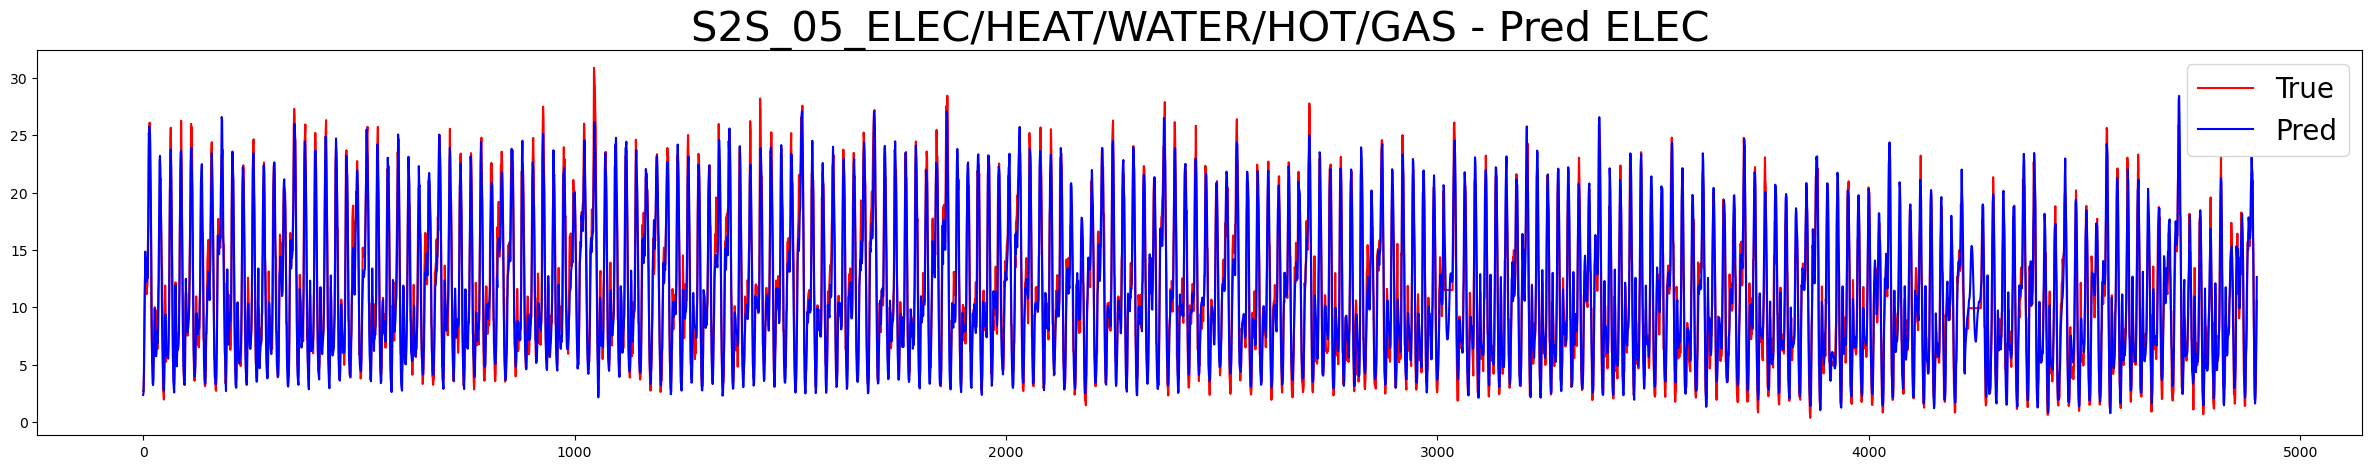

MAE  :  0.0
MAPE :  8749.0389
MSE  :  0.0
RMSE :  0.0
MBE :  -0.0
R2   :  0.8411


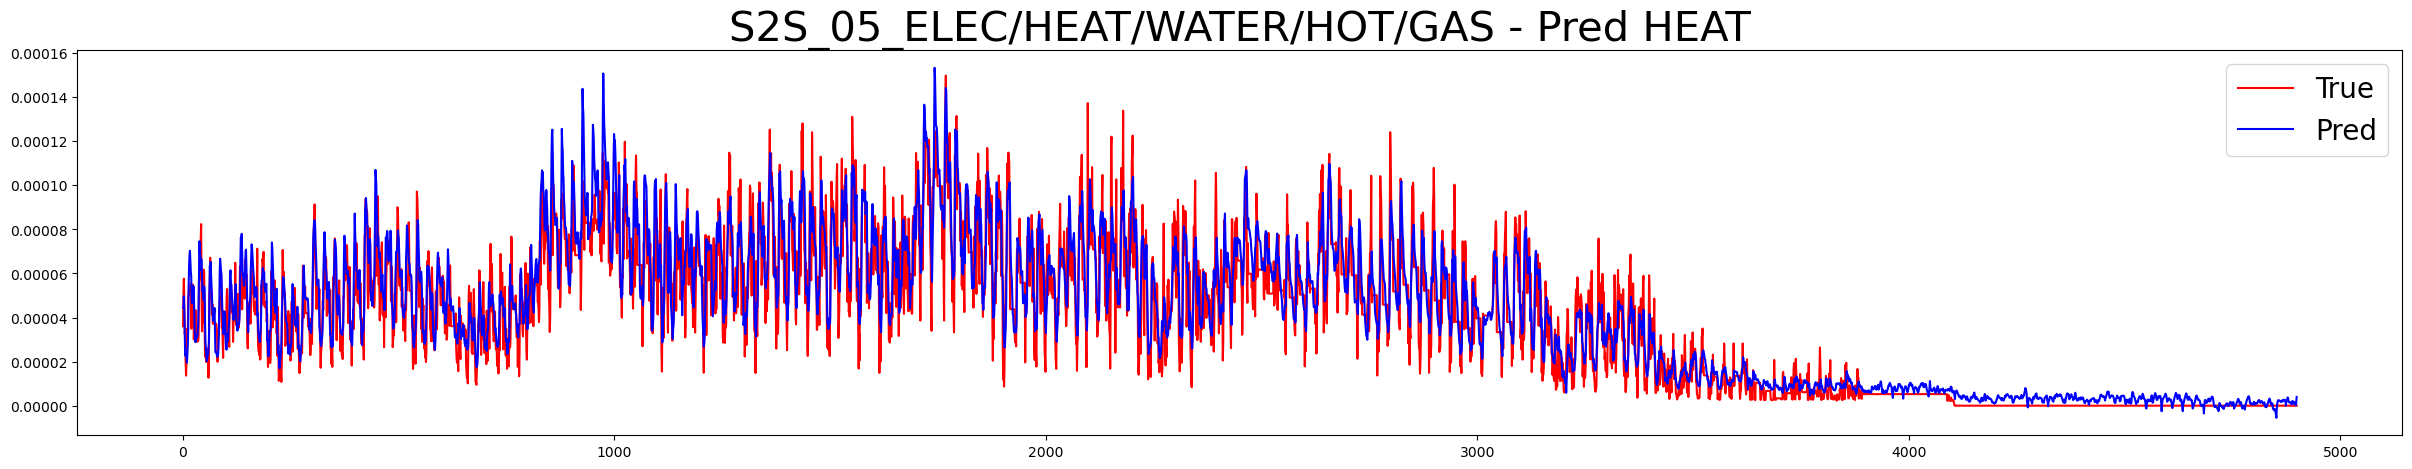

MAE  :  0.0465
MAPE :  0.2745
MSE  :  0.0039
RMSE :  0.0623
MBE :  -0.0063
R2   :  0.693


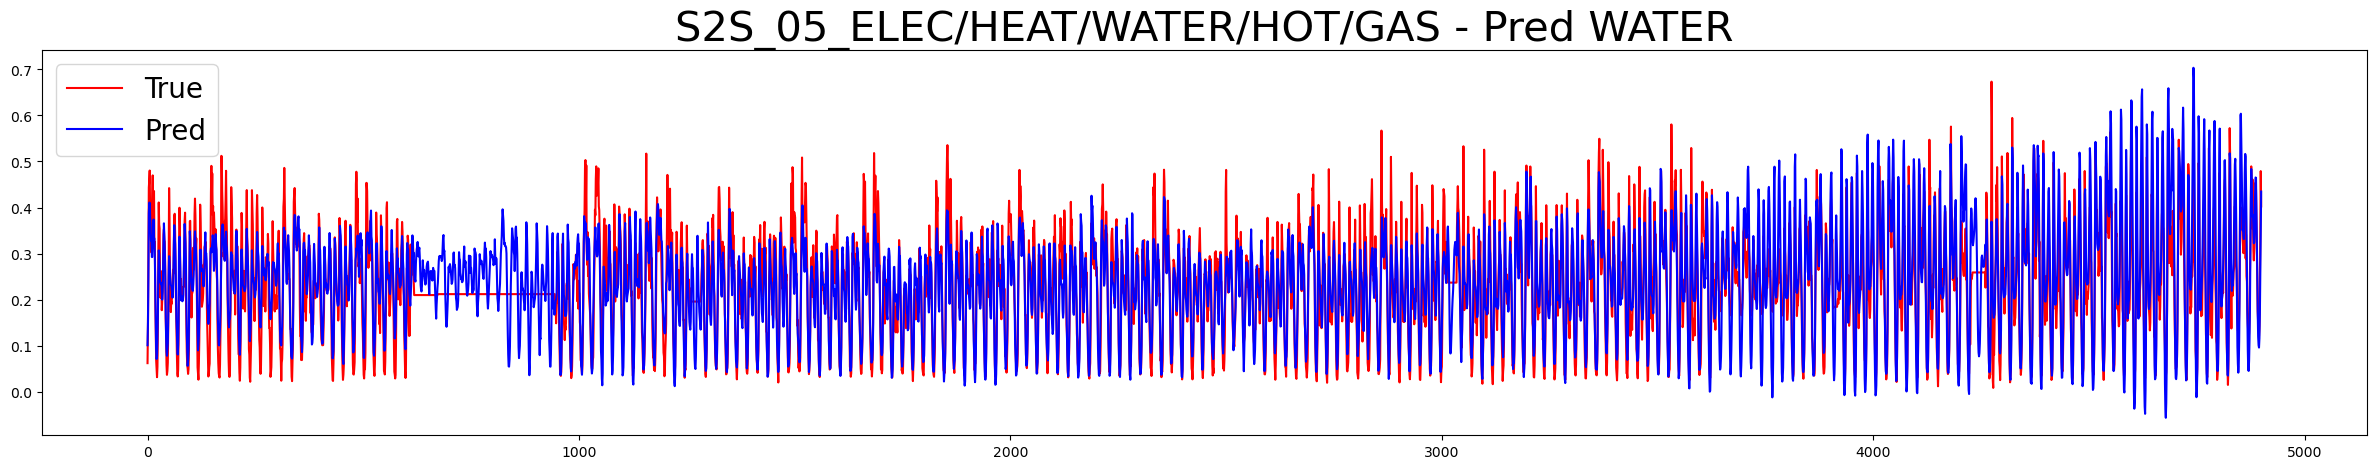

MAE  :  0.1594
MAPE :  1.4152
MSE  :  0.0685
RMSE :  0.2617
MBE :  0.093
R2   :  0.6013


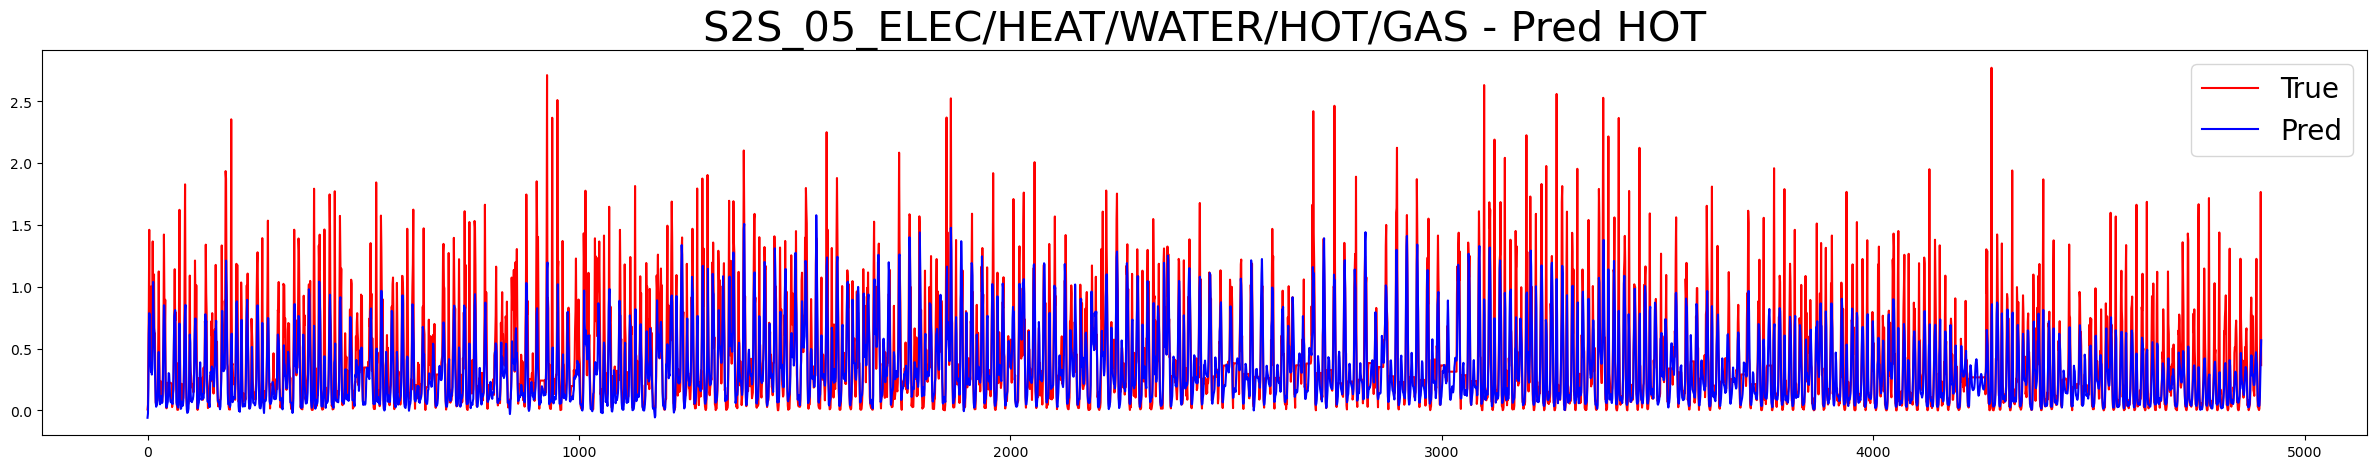

MAE  :  0.1584
MAPE :  11846479863041.135
MSE  :  0.0427
RMSE :  0.2066
MBE :  -0.0669
R2   :  0.4316


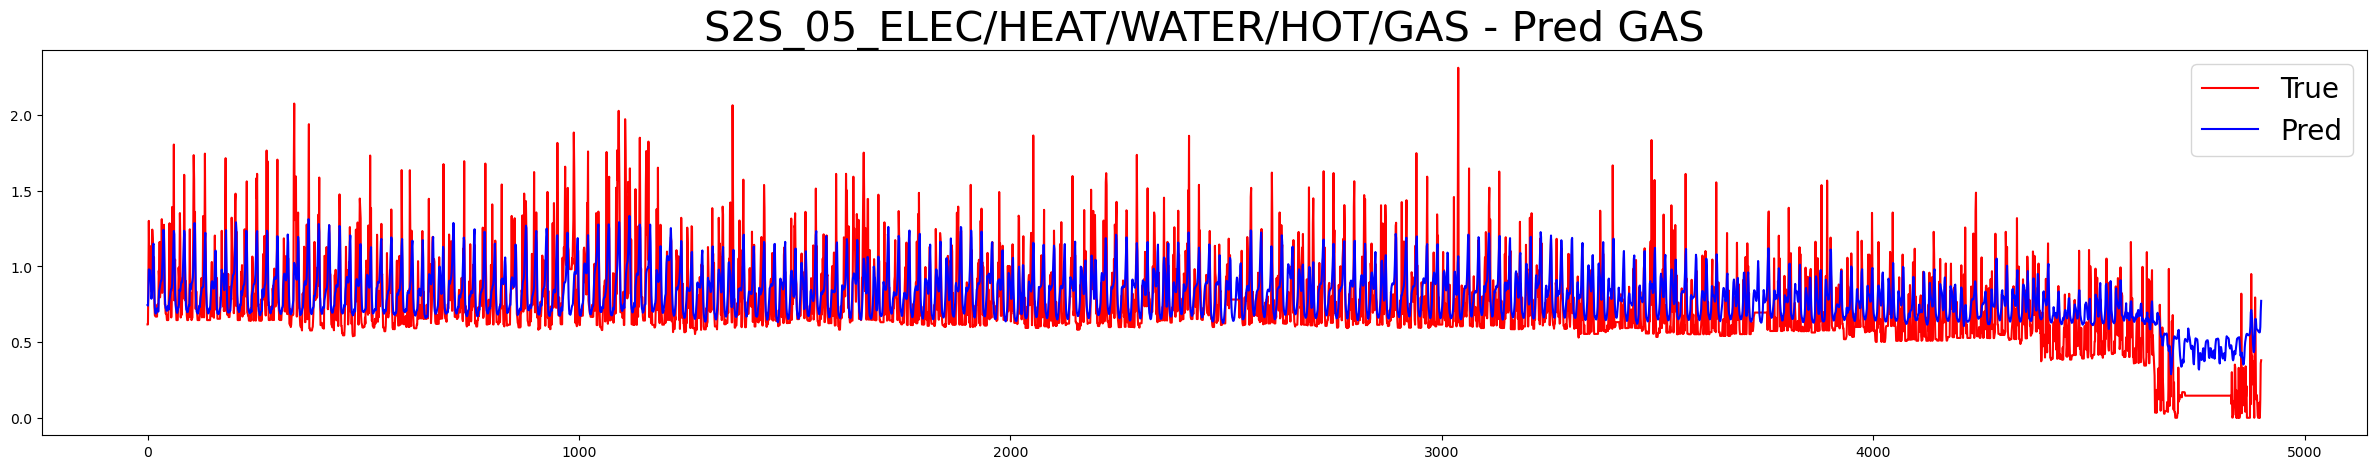

In [ ]:
model_5multi_evaluation(model_5multi, back_data, testx, testy, "S2S_05_ELEC/HEAT/WATER/HOT/GAS", ["ELEC", "HEAT", "WATER", "HOT", "GAS"])